<a href="https://colab.research.google.com/github/ndtuan10/Image-Processing-And-Applications_CS406.M11.KHCL/blob/main/BaiTap/Binary_Image_Processing/BaiTap4%3A%20Binary%20Image%20Processing%20(Erosion%2C%20Dilation%2C%20Opening%2C%20Closing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ngô Đức Tuấn**

MSSV: 18520186

##**Bài tập 4: Xử lý ảnh nhị phân (Binary image processing)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path ='/content/drive/MyDrive/CS406.M11.KHCL/Baitap/Baitap4/images/'

In [ ]:
path_img1 = os.path.join(path,'j.png')
path_img2 = os.path.join(path,'vantay.jpg')
path_img3 = os.path.join(path,'rice.png')
path_img4 = os.path.join(path,'Coins.jpg')

In [ ]:
# Hiển thị ảnh kết quả
def show(img, new_img, title1, title2):
    plt.figure(figsize = (10, 10))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = plt.imshow(img, interpolation = 'bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    new_img = plt.imshow(new_img, interpolation = 'bicubic')

In [ ]:
img1 = cv2.imread(path_img1)
img2 = cv2.imread(path_img2,0)
img3 = cv2.imread(path_img3,0)
img4 = cv2.imread(path_img4,0)

# **Yêu cầu 1: Cài đặt các phép biến đổi: Erosion, Dilation, Opening, Closing trên ảnh j.png**

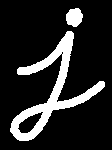

In [ ]:
cv2_imshow(img1)

## **1.1 Erosion**

In [ ]:
def erosion(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.erode(f, kernel, cv2.BORDER_REFLECT)

    return new_image

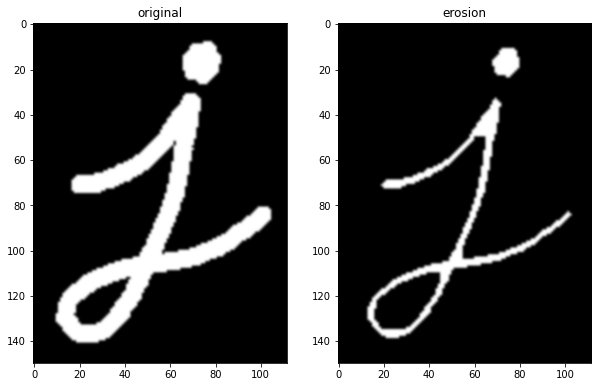

In [ ]:
show(img1, erosion(img1, 5), "original", "erosion")

## **1.2 Dilation**

In [ ]:
def dilation(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.dilate(f, kernel, cv2.BORDER_REFLECT)

    return new_image

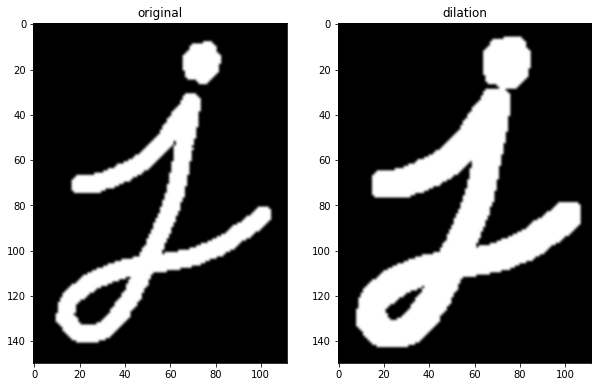

In [ ]:
show(img1, dilation(img1, 5), "original", "dilation")

## **1.3 Opening**

In [ ]:
def opening(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.morphologyEx(f, cv2.MORPH_OPEN, kernel)

    return new_image

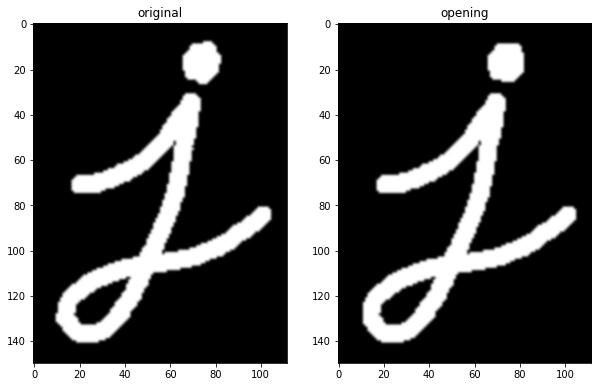

In [ ]:
show(img1, opening(img1, 5), "original", "opening")

## **1.4 Closing**

In [ ]:
def closing(f, s):
    kernel = np.ones((s, s), np.uint8)
    new_image = cv2.morphologyEx(f, cv2.MORPH_CLOSE, kernel)

    return new_image

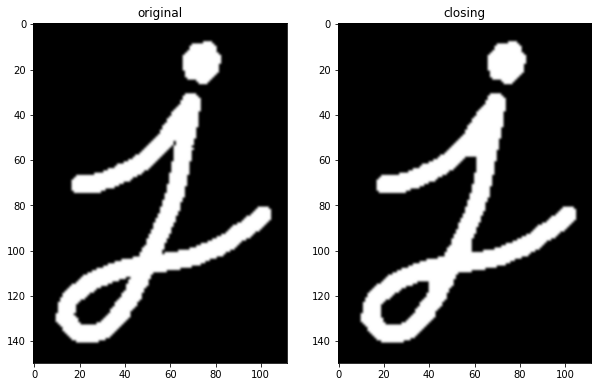

In [ ]:
show(img1, closing(img1, 5), "original", "closing")

# **Yêu cầu 2: Áp dụng các phép biến đổi trên ảnh sao cho:**

In [ ]:
import pandas as pd

results_dict={'Ảnh': ['vantay', 'coins', 'rice'], 'Yêu cầu': ['Các nét vân tay rõ ràng', 'Lấy được các đồng xu', 'Lấy được các hạt gạo'],}

pd.DataFrame(results_dict)

,Ảnh,Yêu cầu
0,vantay,Các nét vân tay rõ ràng
1,coins,Lấy được các đồng xu
2,rice,Lấy được các hạt gạo


In [ ]:
def threshold(img, T):
    new_img = img.copy()
    w, h = img.shape
    for i in range (w):
        for j in range (h):
                if (img[i][j]) > T:
                    new_img[i][j] = 255
                else:
                    new_img[i][j] = 0
    return new_img

## **2.1 Các nét vân tay rõ ràng trong ảnh vantay**

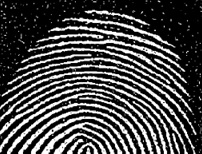

In [ ]:
cv2_imshow(img2)

In [ ]:
thresh = threshold(img2, 130)
vantay = opening(thresh, 2)
vantay = closing(vantay, 2)

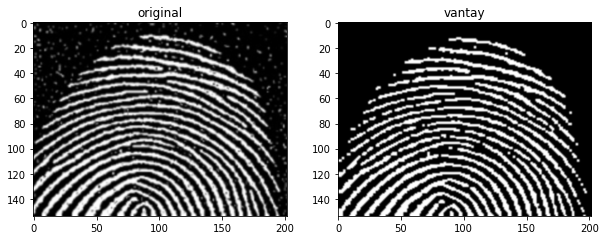

In [ ]:
show(img2, vantay, "original", "vantay")

## **2.2 Lấy được các đồng xu trong ảnh coins**

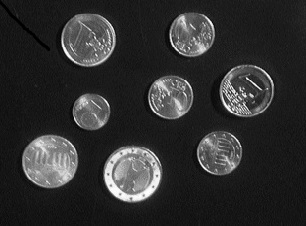

In [ ]:
cv2_imshow(img4)

In [ ]:
thresh = threshold(img4, 60)
coins = closing(thresh, 5)
coins = dilation(coins, 5)
coins = dilation(coins, 5)
coins = erosion(coins, 5)

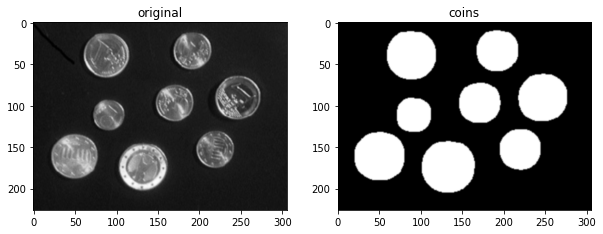

In [ ]:
show(img4, coins, "original", "coins")

## **2.3 Lấy được các hạt gạo trong ảnh rice**

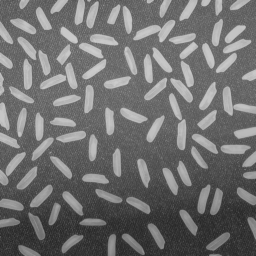

In [ ]:
cv2_imshow(img3)

In [ ]:
thresh = threshold(img3, 110)
rice = opening(thresh, 2)
rice = erosion(rice, 5)
rice = dilation(rice, 4)

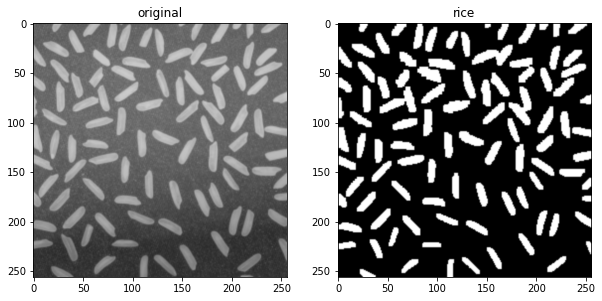

In [ ]:
show(img3, rice, "original", "rice")